In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from pycebox.ice import ice, ice_plot
import pycebox.ice as pice 

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = '{:.4f}'.format
sns.set()

In [ ]:
# load dataset
raw_df = pd.read_csv("bike.csv")
raw_df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.1758,80.5833,10.7499,985,0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.0835,69.6087,16.6521,801,1
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.2291,43.7273,16.6367,1349,2


In [ ]:
# dummy encode categorical columns
df = pd.get_dummies(data=raw_df)
df.head(3)

,yr,temp,hum,windspeed,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,holiday_HOLIDAY,holiday_NO HOLIDAY,weekday_FRI,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.1758,80.5833,10.7499,985,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,2011,9.0835,69.6087,16.6521,801,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,2011,1.2291,43.7273,16.6367,1349,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [ ]:
# train simple model
y = df['cnt']
x = df.drop('cnt', axis=1)

rf = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1,max_depth=5)
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

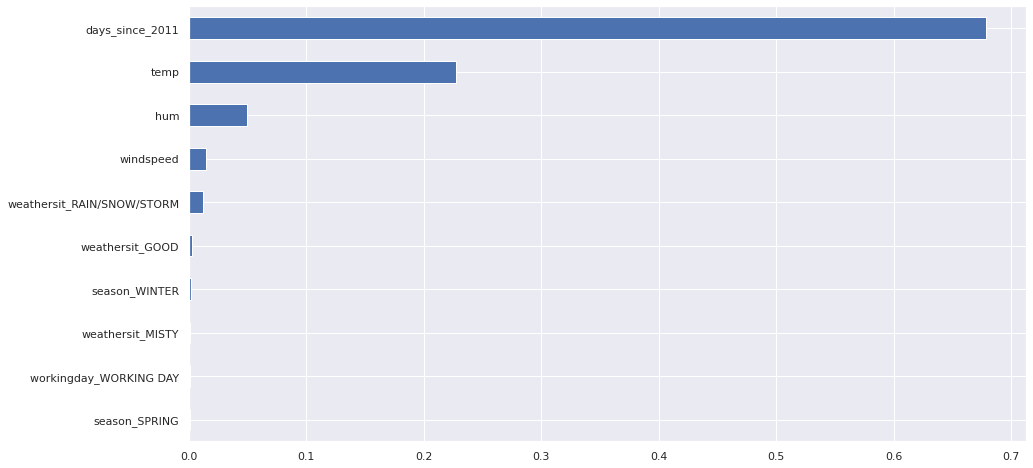

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(15,8)) 

In [ ]:
feat_importances.sum()

1.0

In [ ]:
# check rmse
predict = rf.predict(x)
mean_squared_error(y, predict,squared=False)

595.500361194972

Text(0.5, 0, 'Temp')

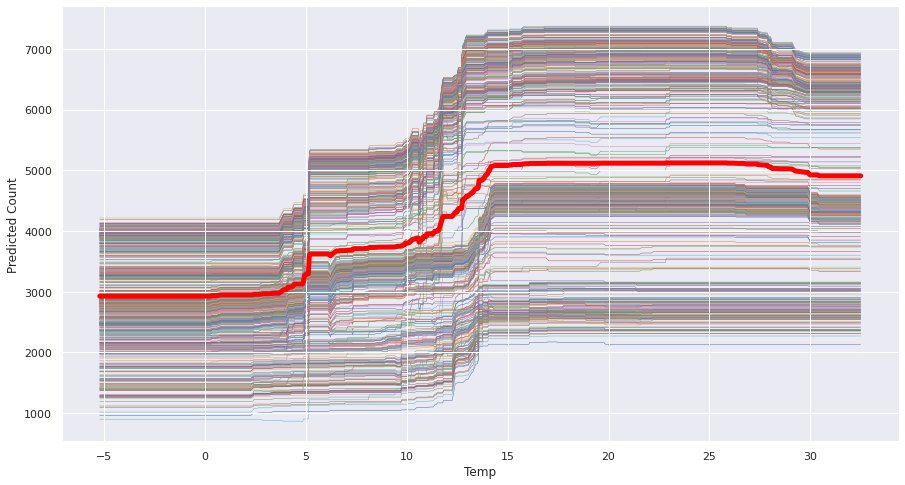

In [ ]:
# uncentered ICE plot for one variable
ice_df = ice(data=x, column='temp', predict=rf.predict)

# Plot the figure
fig, ax = plt.subplots(figsize=(15, 8))
ice_plot(ice_df, linewidth=.5,  plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5}, ax=ax)
 
ax.set_ylabel('Predicted Count')
ax.set_xlabel('Temp')

In [ ]:
# There is an error in the __gen_quantiles() in the ice_plot, patch it below: 
def __get_quantiles(x):
    return np.greater.outer(x, x).sum(axis=1) / x.size
pice.__get_quantiles = __get_quantiles

Text(0.5, 0, 'Temp')

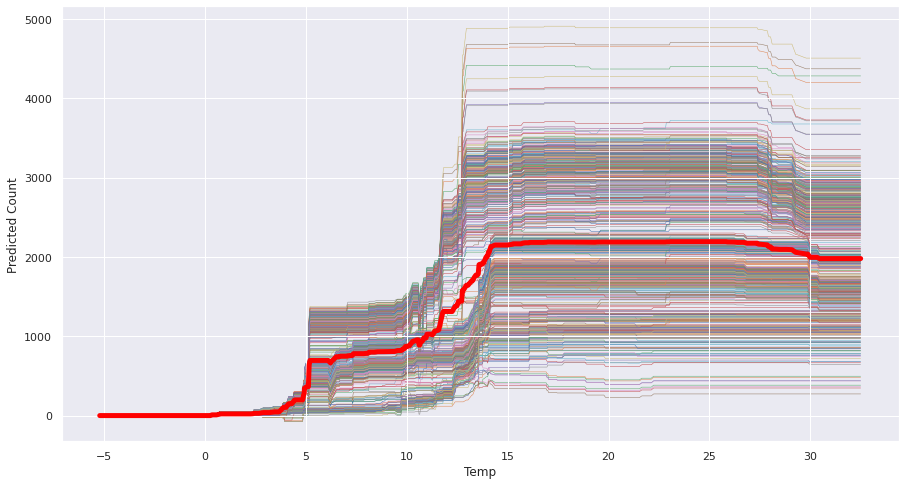

In [ ]:
# Centered ICE plot for one variable
ice_df = ice(data=x, column='temp', predict=rf.predict)

# Plot the figure
fig, ax = plt.subplots(figsize=(15, 8))
ice_plot(ice_df, linewidth=.5,  plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5}, ax=ax,centered=True)
 
ax.set_ylabel('Predicted Count')
ax.set_xlabel('Temp')

In [ ]:
ice_df.shape, x.shape

((499, 731), (731, 35))

In [ ]:
ice_df.head(1)

data_temp                    -5.2209   -3.4635   -3.4226   -2.9475   -2.0075  \
yr                         2011.0000 2011.0000 2011.0000 2012.0000 2012.0000   
hum                          40.0000   43.6522   49.1739   41.4583   46.4583   
windspeed                    11.5220   16.5222   10.6081   12.3749   27.4172   
days_since_2011             21.0000   22.0000   23.0000   368.0000  407.0000   
season_FALL                   0.0000    0.0000    0.0000    0.0000    0.0000   
season_SPRING                 1.0000    1.0000    1.0000    1.0000    1.0000   
season_SUMMER                 0.0000    0.0000    0.0000    0.0000    0.0000   
season_WINTER                 0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_APR                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_AUG                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_DEC                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_FEB                      0.0000    0.0000    0.0000    0.0000    1.0000   
mnth_JAN                      1.0000    1.0000    1.0000    1.0000    0.0000   
mnth_JUL                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_JUN                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_MAR                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_MAY                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_NOV                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_OCT                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_SEP                      0.0000    0.0000    0.0000    0.0000    0.0000   
holiday_HOLIDAY               0.0000    0.0000    0.0000    0.0000    0.0000   
holiday_NO HOLIDAY            1.0000    1.0000    1.0000    1.0000    1.0000   
weekday_FRI                   0.0000    0.0000    0.0000    0.0000    0.0000   
weekday_MON                   0.0000    0.0000    1.0000    0.0000    0.0000   
weekday_SAT                   1.0000    0.0000    0.0000    0.0000    0.0000   
weekday_SUN                   0.0000    1.0000    0.0000    0.0000    1.0000   
weekday_THU                   0.0000    0.0000    0.0000    0.0000    0.0000   
weekday_TUE                   0.0000    0.0000    0.0000    0.0000    0.0000   
weekday_WED                   0.0000    0.0000    0.0000    1.0000    0.0000   
workingday_NO WORKING DAY     1.0000    1.0000    0.0000    0.0000    1.0000   
workingday_WORKING DAY        0.0000    0.0000    1.0000    1.0000    0.0000   
weathersit_GOOD               1.0000    1.0000    1.0000    0.0000    1.0000   
weathersit_MISTY              0.0000    0.0000    0.0000    1.0000    0.0000   
weathersit_RAIN/SNOW/STORM    0.0000    0.0000    0.0000    0.0000    0.0000   
temp                                                                           
-5.2209                    1268.0859 1282.2423 1406.7279 2859.1949 2578.0185   

data_temp                    -1.6652   -1.4983   -1.2156   -0.9500   -0.9108  \
yr                         2011.0000 2011.0000 2011.0000 2012.0000 2011.0000   
hum                          49.4783   43.4167   43.7391   44.1250   48.2917   
windspeed                    12.6522   24.2507   14.8696   24.5000   14.9589   
days_since_2011             39.0000   8.0000    40.0000   367.0000  9.0000     
season_FALL                   0.0000    0.0000    0.0000    0.0000    0.0000   
season_SPRING                 1.0000    1.0000    1.0000    1.0000    1.0000   
season_SUMMER                 0.0000    0.0000    0.0000    0.0000    0.0000   
season_WINTER                 0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_APR                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_AUG                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_DEC                      0.0000    0.0000    0.0000    0.0000    0.0000   
mnth_FEB                      1.0000    0.0000    1.0000    0.0000    0.0000   